In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [20]:

np.random.seed(42)
n_customers = 200
n_transactions = 1500

customer_ids = np.random.choice(range(1, n_customers + 1), size=n_transactions, replace=True)
invoice_dates = pd.to_datetime(np.random.choice(pd.date_range("2024-01-01", "2024-12-31"), size=n_transactions))
invoice_numbers = np.random.randint(10000, 99999, size=n_transactions)
amounts = np.round(np.random.uniform(5.0, 1000.0, size=n_transactions), 2)

data = pd.DataFrame({
    'CustomerID': customer_ids,
    'InvoiceDate': invoice_dates,
    'InvoiceNo': invoice_numbers,
    'Amount': amounts
})


In [21]:
data = pd.read_csv("data2.csv.csv", parse_dates=['InvoiceDate'])
data.head()


,CustomerID,InvoiceDate,InvoiceNo,Amount
0,103,2024-05-28,12539,159.05
1,180,2024-09-23,32669,945.01
2,93,2024-10-22,80968,737.85
3,15,2024-01-11,30644,883.58
4,107,2024-06-12,28745,206.62


In [22]:
snapshot_date = data['InvoiceDate'].max() + timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Amount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,1,22,14,7158.61
1,2,2,6,2609.07
2,3,13,7,2888.24
3,4,87,7,3696.82
4,5,8,11,5360.99


In [23]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,1,22,14,7158.61,3,4,4,344,11
1,2,2,6,2609.07,4,1,2,412,7
2,3,13,7,2888.24,4,2,2,422,8
3,4,87,7,3696.82,1,2,3,123,6
4,5,8,11,5360.99,4,4,4,444,12


In [24]:
def segment_customer(score):
    if score >= 9:
        return 'Champions'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,1,22,14,7158.61,3,4,4,344,11,Champions
1,2,2,6,2609.07,4,1,2,412,7,Loyal
2,3,13,7,2888.24,4,2,2,422,8,Loyal
3,4,87,7,3696.82,1,2,3,123,6,Potential
4,5,8,11,5360.99,4,4,4,444,12,Champions


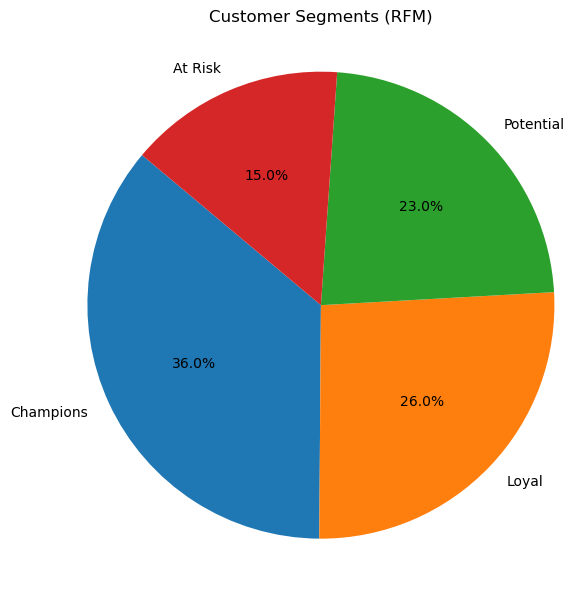

In [25]:
plt.figure(figsize=(6, 6))
segment_counts = rfm['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segments (RFM)')
plt.axis('equal')
plt.tight_layout()
plt.show()


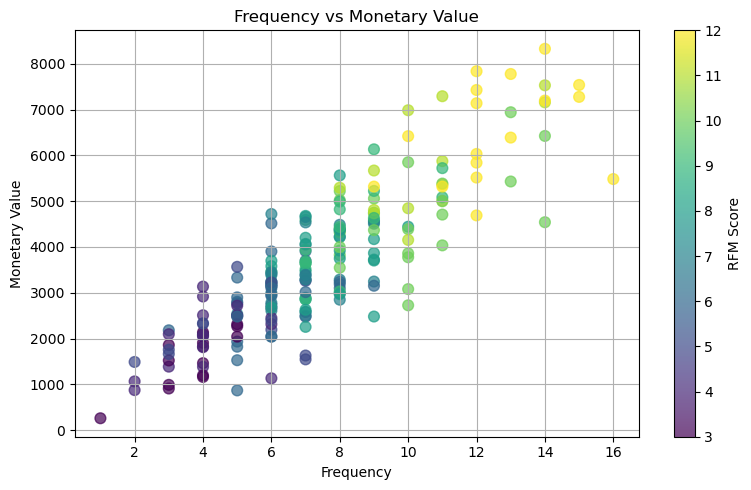

In [26]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['RFM_Score'], cmap='viridis', s=60, alpha=0.7)
plt.colorbar(scatter, label='RFM Score')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Frequency vs Monetary Value')
plt.grid(True)
plt.tight_layout()
plt.show()


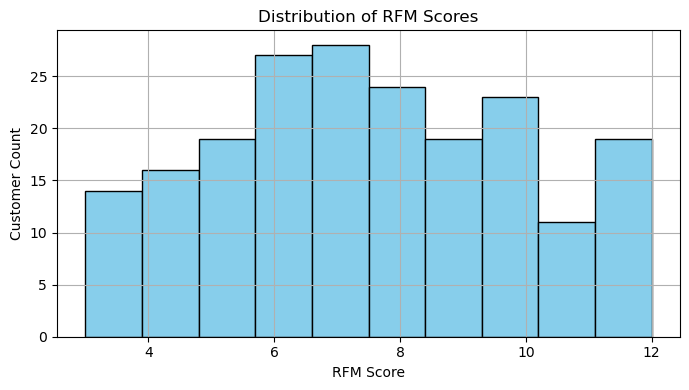

In [27]:
plt.figure(figsize=(7, 4))
rfm['RFM_Score'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()
